In [27]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as pl
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t
from scipy.stats import chisquare
import pandas as pd

pl.rcParams['figure.figsize'] = (16, 5)
pl.rc('xtick', labelsize=16)
pl.rc('ytick', labelsize=16)

In [28]:
data = pd.read_csv("Semana1.csv", sep=",")
data.columns

Index(['laser_z (mm)', 'sigma_laser (mm)', 'anteparo_z (mm)',
       'sigma_anteparo (mm)'],
      dtype='object')

In [29]:
xdata = np.asarray(pd.to_numeric(data['laser_z (mm)']))
xerro = np.asarray(pd.to_numeric(data['sigma_laser (mm)']))
ydata = np.asarray(pd.to_numeric(data['anteparo_z (mm)']))
yerro = np.asarray(pd.to_numeric(data['sigma_anteparo (mm)']))

In [30]:
#Modelos
def linear_fit(x, m, b):
    return m*x + b

In [31]:
init_guess =[1.,1.] #Array com chutes para cada parâmetro
fit=curve_fit(linear_fit, xdata, ydata, sigma=yerro, p0=init_guess, absolute_sigma=True)
ans, cov = fit
print(ans, '\n\n', cov)
#Output são meus 2 valores de parâmetros e a matrix de covariancia, a incerteza dos parametros é:
# np.sqrt(np.diag(ans))

[ -0.60632229 154.61586417] 

 [[ 6.14385495e-07 -5.80274171e-05]
 [-5.80274171e-05  5.61214638e-03]]


In [32]:
#Somatorio do observado-modelo define chi quadrado
#def chi2(r_plum,M,bg):
#    return np.sum((ydata-plummer_model(xdata,r_plum,M,bg))**2/yerro**2)

alpha = 0.05 # 95% confidence interval = 100*(1-alpha)

n = len(ydata)    # number of data points
p = len(ans) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof) 

for i, p,var in zip(range(n), ans, np.diag(cov)):
    sigma = var**0.5
    print ('p{0}: {1} [{2}  {3}]'.format(i, p,
                                  p - sigma*tval,
                                  p + sigma*tval))

p0: -0.6063222931059948 [-0.607976024501485  -0.6046685617105046]
p1: 154.615864167481 [154.45780889434602  154.77391944061597]


In [34]:
x_plots = np.linspace(70.,125.,100) # vetor para plotar o modelo 

Coeficiente angular e linear, respectivamente são: [ -0.60632229 154.61586417]  ± [0.00078383 0.07491426]


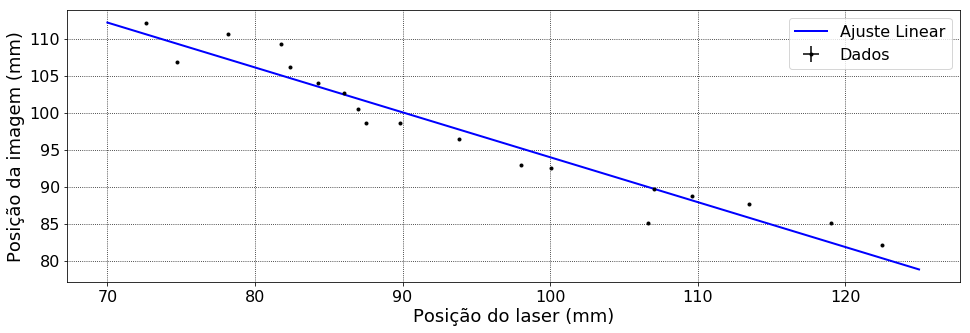

In [47]:
pl.errorbar(xdata, ydata, xerr= xerro, yerr=yerro, fmt='.',c='k',label=r'Dados')
pl.plot(x_plots,linear_fit(x_plots,ans[0],ans[1]),c='b',lw=2,label=r'Ajuste Linear')
pl.xlabel(r'Posição do laser (mm)', fontsize=18)
pl.ylabel(r'Posição da imagem (mm)', fontsize=18)
pl.legend(loc="upper right",fontsize = 16)
pl.grid(ls=':',c='k')
pl.savefig('Semana 1 - Lente delgada.png')
print('Coeficiente angular e linear, respectivamente são:',ans,' ±', np.sqrt(np.diag(cov)))

In [ ]:
# Exportando para csv para jogar no moodle:
data = {'X':xdata, 'erro X':x_erro}
df = pd.DataFrame(data, columns=['X', 'erro X'])
df.to_csv('Export_to_moodle.csv')

In [37]:
chisquare(ydata, linear_fit(xdata, ans[0],ans[1]))

Power_divergenceResult(statistic=1.0211184142540317, pvalue=0.9999999958926087)